<h1 align="center">Spark Funds Investment Case Study

<h1>Data Cleaning

In [1]:
#importing libraries NumPy and Pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.gridspec import GridSpec
pd.options.mode.chained_assignment = None

*Reading the companies and rounds2 csv files*

In [2]:
rounds2 = pd.read_csv("rounds2.csv",encoding = "ISO-8859-1")

In [3]:
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [4]:
companies = pd.read_csv("companies.csv",encoding = "ISO-8859-1")

In [5]:
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


If you observe the last rows of the data we have some un encoded values in  permalink,name and company_permalink columns. These characters are in UTF-8 format standard, yet is backwards compatible with ASCII.We have to encode this characters to UTF-8 and decode it to ASCII because of its backwards compatability.

In [6]:
#Fixing the unencoded values
rounds2['company_permalink']=rounds2.company_permalink.str.encode('utf-8').str.decode('ascii','ignore')
companies['permalink']=companies.permalink.str.encode('utf-8').str.decode('ascii','ignore')
companies['name']=companies.name.str.encode('utf-8').str.decode('ascii','ignore')

In [7]:
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [8]:
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/Eron,ERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


***How many unique companies are present in rounds2?***

To find unique companies we need to convert company_permalink columns in to lower case and also remove spaces.

In [9]:
rounds2["company_permalink"]=rounds2["company_permalink"].str.lower().replace(" ","")

In [10]:
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


***How many unique companies are present in rounds2?***

In [11]:
rounds2["company_permalink"].unique().shape

(66368,)

***How many unique companies are present in companies?***

In [12]:
companies.permalink=companies.permalink.str.lower().replace(" ","")

In [13]:
companies.permalink.unique().shape

(66368,)

In [14]:
companies.shape

(66368, 10)

***In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.***

In **permalink** column in companies have same number of rows we have on the companies data frame. Hence the we can use this column as unique column.

***Are there any companies in the rounds2 file which are not present in companies?***

In [15]:
rounds2[~rounds2['company_permalink'].isin(companies['permalink'])]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


***Answer***

there are no companies in the rounds2 file which are not present in companies

***Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?***

Now we are merging Dataframes

In [16]:
master_frame=pd.merge(rounds2,companies,how="inner",left_on="company_permalink",right_on="permalink")

In [17]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [18]:
master_frame.shape

(114949, 16)

***Before doing further analysis, we need to clean the data***

In this process we will remove unnecessary columns.

In [19]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

***Removing unnecessary columns***

In [20]:
master_frame=master_frame[['permalink','funding_round_type','raised_amount_usd','name','category_list','country_code']]

In [21]:
master_frame.head(2)

,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA


*Finding and removing the missing values -- Null and NAN*

In [22]:
master_frame.isnull().sum()

permalink                 0
funding_round_type        0
raised_amount_usd     19990
name                      1
category_list          3410
country_code           8678
dtype: int64

In [23]:
master_frame.head(5)

,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,venture,3406878.0,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN


Now we can find the missing values in columns

In [24]:
master_frame.isnull().sum()

permalink                 0
funding_round_type        0
raised_amount_usd     19990
name                      1
category_list          3410
country_code           8678
dtype: int64

Now we will calculate percentage of missing values in each columns

In [25]:
round(100*(master_frame.isnull().sum()/len(master_frame)),2)

permalink              0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.00
category_list          2.97
country_code           7.55
dtype: float64

In [26]:
master_frame=master_frame[~master_frame.category_list.isnull()]

In [27]:
master_frame=master_frame[~master_frame.country_code.isnull()]

In [28]:
round(100*(master_frame.isnull().sum()/len(master_frame)),2)

permalink              0.00
funding_round_type     0.00
raised_amount_usd     15.31
name                   0.00
category_list          0.00
country_code           0.00
dtype: float64

We are not going to impute the mean or median for missing values in the raised_amount_usd column because it will skew our histograms, it also underestimates the variance in our data because we’re making numerous values the exact same. Therefore we are going to drop the missing values in the raised_amount_usd column

In [29]:
master_frame=master_frame[~master_frame.raised_amount_usd.isnull()]

In [30]:
master_frame.shape

(88529, 6)

<h1>Funding Type Analysis</h1>

We are going to select venture,seed,private_equity and angel funding types into one new dataframe by grouping.We will analyse sum,mean median of these funding types.

In [31]:
master_frame.funding_round_type.unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [32]:
master_frame=master_frame.loc[master_frame['funding_round_type'].isin(['venture','angel','seed','private_equity'])]

In [33]:
master_frame.head(5)

,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
7,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN


In [34]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [35]:
master_frame.groupby(['funding_round_type']).sum().sort_values(by = 'raised_amount_usd',ascending=False)

,raised_amount_usd
funding_round_type,
venture,560523362596.00000
private_equity,134568045021.00000
seed,15774707732.00000
angel,4274925121.00000


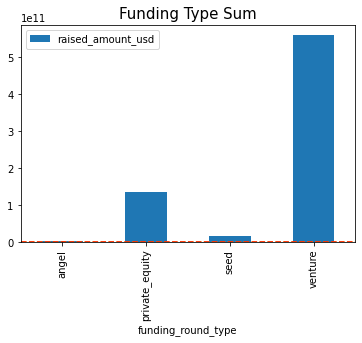

In [36]:
master_frame.groupby(['funding_round_type']).sum().plot.bar()
plt.title("Funding Type Sum",size=15)
plt.axhline(5000000, color='yellow', linestyle='--',label="5M USD")
plt.axhline(15000000, color='red', linestyle='--',label="15M USD")
plt.show()

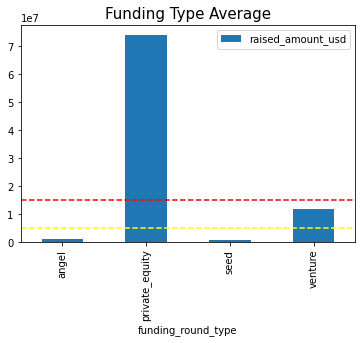

In [37]:
master_frame.groupby(['funding_round_type']).mean().plot.bar()
plt.title("Funding Type Average",size=15)
plt.axhline(5000000, color='yellow', linestyle='--',label="5M USD")
plt.axhline(15000000, color='red', linestyle='--',label="15M USD")
plt.show()

<h3>Answer</h3>
If you observe the above data and bar plots, mean, median and sum, Venture is the best funding type for invest. As <b>Spark Funds strategy to invest where most other investors are investing</b>. If you observe the sum of Venture fund type, <b>most of the investors invested in Venture. Venture funding type mean also fall between the Spark Funds investment range 5 to 15 million USD</b>

<h1>Country Analysis

In [38]:
top9=master_frame[master_frame['funding_round_type']=='venture']

In [39]:
top9_copy=top9.copy()
top9.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.00000,#fame,Media,IND
4,/organization/0-6-com,venture,2000000.00000,0-6.com,Curated Web,CHN
8,/organization/0ndine-biomedical-inc,venture,719491.00000,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,venture,20000000.00000,H2O.ai,Analytics,USA
11,/organization/0xdata,venture,1700000.00000,H2O.ai,Analytics,USA


In [40]:
top9.groupby(['country_code']).sum().sort_values(by = 'raised_amount_usd',ascending=False).head(9)

,raised_amount_usd
country_code,
USA,420068029342.00000
CHN,39338918773.00000
GBR,20072813004.00000
IND,14261508718.00000
CAN,9482217668.00000
FRA,7226851352.00000
ISR,6854350477.00000
DEU,6306921981.00000
JPN,3167647127.00000


In [41]:
top9_bar=top9.groupby(['country_code']).sum().sort_values(by = 'raised_amount_usd',ascending=False).head(9)

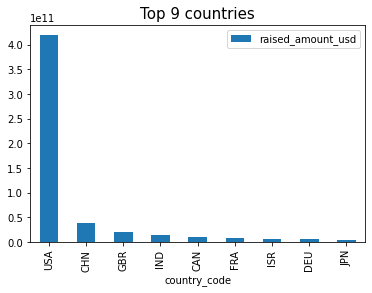

In [42]:
top9.groupby(['country_code']).sum().sort_values(by = 'raised_amount_usd',ascending=False).head(9).plot.bar()
plt.title("Top 9 countries",size=15)
plt.show()

***Country Analysis Answer***

If you observe the above plot top highest investment countries are USA,CHN,GBR,IND,CAN,FRA,ISR,DEU,JPN. In these countries **Top 3 English Speaking countries are USA,GBR and IND**

In [43]:
top9=top9[top9['country_code'].isin(['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'])]

In [44]:
top3=top9.loc[top9['country_code'].isin(['IND','USA','GBR'])]

In [45]:
top3.head(5)

,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.00000,#fame,Media,IND
10,/organization/0xdata,venture,20000000.00000,H2O.ai,Analytics,USA
11,/organization/0xdata,venture,1700000.00000,H2O.ai,Analytics,USA
12,/organization/0xdata,venture,8900000.00000,H2O.ai,Analytics,USA
22,/organization/1-mainstream,venture,5000000.00000,1 Mainstream,Apps|Cable|Distribution|Software,USA


***If you observe the above data in all countries most invested companies are in operating status.***

<h1>Sector Analysis 1

**Creating main_sector by spliting category_list**

In [46]:
top9['primary_sector']=top9.category_list.apply(lambda x: str(x).split('|')[0].lower())

In [47]:
top9.head(10)

,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector
0,/organization/-fame,venture,10000000.00000,#fame,Media,IND,media
4,/organization/0-6-com,venture,2000000.00000,0-6.com,Curated Web,CHN,curated web
8,/organization/0ndine-biomedical-inc,venture,719491.00000,Ondine Biomedical Inc.,Biotechnology,CAN,biotechnology
10,/organization/0xdata,venture,20000000.00000,H2O.ai,Analytics,USA,analytics
11,/organization/0xdata,venture,1700000.00000,H2O.ai,Analytics,USA,analytics
12,/organization/0xdata,venture,8900000.00000,H2O.ai,Analytics,USA,analytics
22,/organization/1-mainstream,venture,5000000.00000,1 Mainstream,Apps|Cable|Distribution|Software,USA,apps
28,/organization/10-minutes-with,venture,4000000.00000,10 Minutes With,Education,GBR,education
34,/organization/1000memories,venture,2520000.00000,1000memories,Curated Web,USA,curated web
38,/organization/1000museums-com,venture,265940.00000,1000museums.com,Curated Web,USA,curated web


**Loading the mapping csv file and cleaning the data**

In [48]:
mapping = pd.read_csv("mapping.csv")

In [49]:
mapping.head(2)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0


Cleaning the data

In [50]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [51]:
mapping=mapping[~mapping.category_list.isnull()]

In [52]:
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [53]:
mapping.category_list=mapping.category_list.apply(lambda x: str(x).lower())

Find the comapnies which are there in mapping and not existed in top9 main_sector

In [54]:
mapping[~mapping['category_list'].isin(top9['primary_sector'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
59,big data a0lytics,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
670,virtual workforces,0,0,0,1,0,0,0,0,0
672,waste ma0gement,0,0,1,0,0,0,0,0,0
682,weddings,0,0,0,1,0,0,0,0,0
683,wholesale,0,0,0,0,0,0,0,1,0


If you observe the above data there are spelling mistakes.

a0lytics -> analytics

ma0gement -> management

It seems we need to replace 0 with na

In [55]:
mapping.category_list=mapping.category_list.apply(lambda x:x.replace('0','na'))

In [56]:
mapping[~mapping['category_list'].isin(top9['primary_sector'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
33,aquaculture,0,0,1,0,0,0,0,0,0
64,biomass power generation,0,0,1,0,0,0,0,0,0
69,boating industry,1,0,0,0,0,0,0,0,0
77,building owners,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
669,video streaming,0,0,0,1,0,0,0,0,0
670,virtual workforces,0,0,0,1,0,0,0,0,0
682,weddings,0,0,0,1,0,0,0,0,0
683,wholesale,0,0,0,0,0,0,0,1,0


Find the comapnies which are there in top3 main_sector and not existed in mapping

In [57]:
top9[~top9['primary_sector'].isin(mapping['category_list'])]

,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,primary_sector
20328,/organization/clean-vehicle-solutions,venture,125000.00000,Clean Vehicle Solutions,Natural Gas Uses|Service Providers|Services,USA,natural gas uses
22940,/organization/consensus-point,venture,788374.00000,Consensus Point,Enterprise 2.0|Enterprise Software|Market Rese...,USA,enterprise 2.0
22942,/organization/consensus-point,venture,2600000.00000,Consensus Point,Enterprise 2.0|Enterprise Software|Market Rese...,USA,enterprise 2.0
28541,/organization/dolores-speech-products,venture,250000.00000,Dolores Speech Products,Adaptive Equipment|Innovation Management|Speec...,USA,adaptive equipment
35278,/organization/fia-formula-e,venture,68569234.00000,FIA Formula E,Racing,GBR,racing
36012,/organization/five-below,venture,194000000.00000,Five Below,Specialty Retail,USA,specialty retail
36291,/organization/flexport,venture,20000000.00000,Flexport,Enterprise 2.0|Enterprise Software|Insurance|L...,USA,enterprise 2.0
43506,/organization/healthtell,venture,9486929.00000,HealthTell,Biotechnology and Semiconductor|Diagnostics|He...,USA,biotechnology and semiconductor
51816,/organization/justinmind,venture,862000.00000,Justinmind,Rapidly Expanding|Software|Usability|User Expe...,USA,rapidly expanding
62174,/organization/mingdao-com,venture,3240000.00000,MINGDAO.COM,Enterprise 2.0|Enterprise Software,CHN,enterprise 2.0


Before merging we need to drop category_list from the top3 dataframe, we have same name column in mapping dataframe.

In [58]:
top9=top9.drop('category_list',axis=1)

In [59]:
top9.head()

,permalink,funding_round_type,raised_amount_usd,name,country_code,primary_sector
0,/organization/-fame,venture,10000000.00000,#fame,IND,media
4,/organization/0-6-com,venture,2000000.00000,0-6.com,CHN,curated web
8,/organization/0ndine-biomedical-inc,venture,719491.00000,Ondine Biomedical Inc.,CAN,biotechnology
10,/organization/0xdata,venture,20000000.00000,H2O.ai,USA,analytics
11,/organization/0xdata,venture,1700000.00000,H2O.ai,USA,analytics


converting mapping DataFrame from wide format to long format

In [60]:
mapping=pd.melt(mapping,id_vars='category_list')

In [61]:
mapping.head(10)

,category_list,variable,value
0,3d,Automotive & Sports,0
1,3d printing,Automotive & Sports,0
2,3d technology,Automotive & Sports,0
3,accounting,Automotive & Sports,0
4,active lifestyle,Automotive & Sports,0
5,ad targeting,Automotive & Sports,0
6,advanced materials,Automotive & Sports,0
7,adventure travel,Automotive & Sports,1
8,advertising,Automotive & Sports,0
9,advertising exchanges,Automotive & Sports,0


Now we can filter the relavent rows where value==1,remove values column 

In [62]:
mapping=mapping[mapping.value==1]

In [63]:
mapping.drop('value',axis=1,inplace=True)

In [64]:
mapping.rename(columns={'variable':'main_sector'},inplace=True)
mapping.head(5)

,category_list,main_sector
7,adventure travel,Automotive & Sports
13,aerospace,Automotive & Sports
44,auto,Automotive & Sports
45,automated kiosk,Automotive & Sports
46,automotive,Automotive & Sports


Now we will merge the mapping with top3 dataframe

In [65]:
top9_mapping=pd.merge(top9,mapping,how='left',left_on='primary_sector',right_on='category_list')

In [66]:
top9_mapping.head()

,permalink,funding_round_type,raised_amount_usd,name,country_code,primary_sector,category_list,main_sector
0,/organization/-fame,venture,10000000.00000,#fame,IND,media,media,Entertainment
1,/organization/0-6-com,venture,2000000.00000,0-6.com,CHN,curated web,curated web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,venture,719491.00000,Ondine Biomedical Inc.,CAN,biotechnology,biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,venture,20000000.00000,H2O.ai,USA,analytics,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,venture,1700000.00000,H2O.ai,USA,analytics,analytics,"Social, Finance, Analytics, Advertising"


Now we have two column with same values but different column nam, we will drop it

In [67]:
top9_mapping.drop('category_list',axis=1,inplace=True)

In [68]:
top9_mapping.head()

,permalink,funding_round_type,raised_amount_usd,name,country_code,primary_sector,main_sector
0,/organization/-fame,venture,10000000.00000,#fame,IND,media,Entertainment
1,/organization/0-6-com,venture,2000000.00000,0-6.com,CHN,curated web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,venture,719491.00000,Ondine Biomedical Inc.,CAN,biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,venture,20000000.00000,H2O.ai,USA,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,venture,1700000.00000,H2O.ai,USA,analytics,"Social, Finance, Analytics, Advertising"


In [69]:
top9_mapping.isnull().sum()

permalink              0
funding_round_type     0
raised_amount_usd      0
name                   0
country_code           0
primary_sector         0
main_sector           16
dtype: int64

<h1>Sector Analysis 2</h1>

Spark Funds prefer the funding range between 5 to 15 million USD, we will filter these funding ranges from the top3_mapping dataframe.

In [70]:
top9_mapping_range=top9_mapping[(top9_mapping.raised_amount_usd>=5000000) & (top9_mapping.raised_amount_usd<=15000000)]

In [71]:
top9_mapping_range.isnull().sum()

permalink             0
funding_round_type    0
raised_amount_usd     0
name                  0
country_code          0
primary_sector        0
main_sector           1
dtype: int64

We have one null values in main_sector, we will remove that.

In [72]:
top9_mapping_range=top9_mapping_range[~top9_mapping_range.main_sector.isnull()]

In [73]:
top9_mapping_range.isnull().sum()

permalink             0
funding_round_type    0
raised_amount_usd     0
name                  0
country_code          0
primary_sector        0
main_sector           0
dtype: int64

In [74]:
D1=top9_mapping_range[top9_mapping_range['country_code']=='USA']

In [75]:
D1.head()

,permalink,funding_round_type,raised_amount_usd,name,country_code,primary_sector,main_sector
5,/organization/0xdata,venture,8900000.00000,H2O.ai,USA,analytics,"Social, Finance, Analytics, Advertising"
6,/organization/1-mainstream,venture,5000000.00000,1 Mainstream,USA,apps,"News, Search and Messaging"
28,/organization/128-technology,venture,11999347.00000,128 Technology,USA,service providers,Others
31,/organization/1366-technologies,venture,15000000.00000,1366 Technologies,USA,manufacturing,Manufacturing
32,/organization/1366-technologies,venture,5000000.00000,1366 Technologies,USA,manufacturing,Manufacturing


In [76]:
D1['raised_amount_usd'].sum()

107757097294.0

In [77]:
D1['raised_amount_usd'].count()

12063

In [78]:
D1['main_sector_count']=D1.groupby('main_sector')['main_sector'].transform('count')

In [79]:
D1['main_sector_total_amount']=D1.groupby('main_sector')['raised_amount_usd'].transform('sum')

In [80]:
D1.head(10)

,permalink,funding_round_type,raised_amount_usd,name,country_code,primary_sector,main_sector,main_sector_count,main_sector_total_amount
5,/organization/0xdata,venture,8900000.00000,H2O.ai,USA,analytics,"Social, Finance, Analytics, Advertising",2714,23807376964.00000
6,/organization/1-mainstream,venture,5000000.00000,1 Mainstream,USA,apps,"News, Search and Messaging",1583,13971567428.00000
28,/organization/128-technology,venture,11999347.00000,128 Technology,USA,service providers,Others,2950,26321007002.00000
31,/organization/1366-technologies,venture,15000000.00000,1366 Technologies,USA,manufacturing,Manufacturing,799,7258553378.00000
32,/organization/1366-technologies,venture,5000000.00000,1366 Technologies,USA,manufacturing,Manufacturing,799,7258553378.00000
33,/organization/1366-technologies,venture,5150000.00000,1366 Technologies,USA,manufacturing,Manufacturing,799,7258553378.00000
34,/organization/1366-technologies,venture,12400000.00000,1366 Technologies,USA,manufacturing,Manufacturing,799,7258553378.00000
35,/organization/1366-technologies,venture,6000000.00000,1366 Technologies,USA,manufacturing,Manufacturing,799,7258553378.00000
41,/organization/170-systems,venture,14000000.00000,170 Systems,USA,software,Others,2950,26321007002.00000
46,/organization/17zuoye,venture,5000000.00000,17zuoye,USA,education,Others,2950,26321007002.00000


In [81]:
D1[D1['main_sector']=='Others'].groupby(['name']).raised_amount_usd.sum().sort_values( ascending=False).head(5)

name
Virtustream           64300000.00000
Capella Photonics     54968051.00000
AirTight Networks     54201907.00000
deCarta               52100000.00000
Black Duck Software   51000000.00000
Name: raised_amount_usd, dtype: float64

In [82]:
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['name']).raised_amount_usd.sum().sort_values( ascending=False).head(5)

name
SST Inc. (Formerly ShotSpotter)   67933006.00000
Demandbase                        63000000.00000
Intacct                           61800000.00000
NetBase Solutions                 60600000.00000
Lotame                            59700000.00000
Name: raised_amount_usd, dtype: float64

In [83]:
D2=top9_mapping_range[top9_mapping_range['country_code']=='GBR']

In [84]:
D2.head()

,permalink,funding_round_type,raised_amount_usd,name,country_code,primary_sector,main_sector
135,/organization/365scores,venture,5500000.00000,365Scores,GBR,android,"Social, Finance, Analytics, Advertising"
310,/organization/7digital,venture,8468328.00000,7digital,GBR,content creators,Entertainment
311,/organization/7digital,venture,10000000.00000,7digital,GBR,content creators,Entertainment
336,/organization/90min,venture,15000000.00000,90min,GBR,media,Entertainment
337,/organization/90min,venture,5800000.00000,90min,GBR,media,Entertainment


In [85]:
D2['raised_amount_usd'].sum()

5379078691.0

In [86]:
D2['raised_amount_usd'].count()

621

In [87]:
D2['main_sector_count']=D2.groupby('main_sector')['main_sector'].transform('count')

In [88]:
D2['main_sector_total_amount']=D2.groupby('main_sector')['raised_amount_usd'].transform('sum')

In [89]:
D2.head()

,permalink,funding_round_type,raised_amount_usd,name,country_code,primary_sector,main_sector,main_sector_count,main_sector_total_amount
135,/organization/365scores,venture,5500000.00000,365Scores,GBR,android,"Social, Finance, Analytics, Advertising",133,1089404014.00000
310,/organization/7digital,venture,8468328.00000,7digital,GBR,content creators,Entertainment,56,482784687.00000
311,/organization/7digital,venture,10000000.00000,7digital,GBR,content creators,Entertainment,56,482784687.00000
336,/organization/90min,venture,15000000.00000,90min,GBR,media,Entertainment,56,482784687.00000
337,/organization/90min,venture,5800000.00000,90min,GBR,media,Entertainment,56,482784687.00000


In [90]:
D2[D2['main_sector']=='Others'].groupby(['name']).raised_amount_usd.sum().sort_values( ascending=False).head(5)

name
Electric Cloud            37000000.00000
SenSage                   36250000.00000
Enigmatec                 32500000.00000
SilverRail Technologies   29000000.00000
OpenCloud                 27972766.00000
Name: raised_amount_usd, dtype: float64

In [91]:
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['name']).raised_amount_usd.sum().sort_values( ascending=False).head(5)

name
Celltick Technologies   37500000.00000
myThings                34000000.00000
Zopa                    32900000.00000
VisualDNA               28550000.00000
MarketInvoice           25553007.00000
Name: raised_amount_usd, dtype: float64

In [92]:
D3=top9_mapping_range[top9_mapping_range['country_code']=='IND']

In [93]:
D3.head()

,permalink,funding_round_type,raised_amount_usd,name,country_code,primary_sector,main_sector
0,/organization/-fame,venture,10000000.00000,#fame,IND,media,Entertainment
74,/organization/21diamonds-india,venture,6369507.00000,21Diamonds,IND,e-commerce,Others
367,/organization/a-little-world,venture,6410000.00000,A LITTLE WORLD,IND,finance,"Social, Finance, Analytics, Advertising"
1066,/organization/adlabs-imagica,venture,8180000.00000,Adlabs Imagica,IND,entertainment,Entertainment
1448,/organization/agile,venture,5740000.00000,Agile,IND,finance,"Social, Finance, Analytics, Advertising"


In [94]:
D3['raised_amount_usd'].sum()

2949543602.0

In [95]:
D3['raised_amount_usd'].count()

328

In [96]:
D3['main_sector_count']=D3.groupby('main_sector')['main_sector'].transform('count')

In [97]:
D3['main_sector_total_amount']=D3.groupby('main_sector')['raised_amount_usd'].transform('sum')

In [98]:
D3.head()

,permalink,funding_round_type,raised_amount_usd,name,country_code,primary_sector,main_sector,main_sector_count,main_sector_total_amount
0,/organization/-fame,venture,10000000.00000,#fame,IND,media,Entertainment,33,280830000.00000
74,/organization/21diamonds-india,venture,6369507.00000,21Diamonds,IND,e-commerce,Others,110,1013409507.00000
367,/organization/a-little-world,venture,6410000.00000,A LITTLE WORLD,IND,finance,"Social, Finance, Analytics, Advertising",60,550549550.00000
1066,/organization/adlabs-imagica,venture,8180000.00000,Adlabs Imagica,IND,entertainment,Entertainment,33,280830000.00000
1448,/organization/agile,venture,5740000.00000,Agile,IND,finance,"Social, Finance, Analytics, Advertising",60,550549550.00000


In [99]:
D3[D3['main_sector']=='Others'].groupby(['name']).raised_amount_usd.sum().sort_values( ascending=False).head(5)

name
FirstCry.com        39000000.00000
Myntra              38000000.00000
CommonFloor         32900000.00000
Pepperfry.com       28000000.00000
ItzCash Card Ltd.   25000000.00000
Name: raised_amount_usd, dtype: float64

In [100]:
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['name']).raised_amount_usd.sum().sort_values( ascending=False).head(4)

name
Manthan Systems   50700000.00000
Komli Media       28000000.00000
ShopClues.com     25000000.00000
inTarvo           21900000.00000
Name: raised_amount_usd, dtype: float64

***Conclusion:***

After analysing the data we came up with best sectors and companies in each country to invest.
In First top country USA it would be best to invest in "Others","Social, Finance, Analytics, Advertising" and "Cleantech / Semiconductors"  are the best sectors, in these sectors we found out Virtustream and SST Inc. (Formerly ShotSpotter) are best companies to invest.
In Second top company GBR it would be best to invest in "Others","Social, Finance, Analytics, Advertising" and "Cleantech / Semiconductors" are the best sectors, in these sectors we found out "Electric Cloud" and "Celltick Technologies" are the best companies to invest.
In Third top country IND it would be best to invest in "Others","Social, Finance, Analytics, Advertising" and "News, Search and Messaging" are the best sectors, in these sectors we found out FirstCry.com and "Manthan Systems" are the best companies to invest.

<h1>Plots

***Plot 1 :***

A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

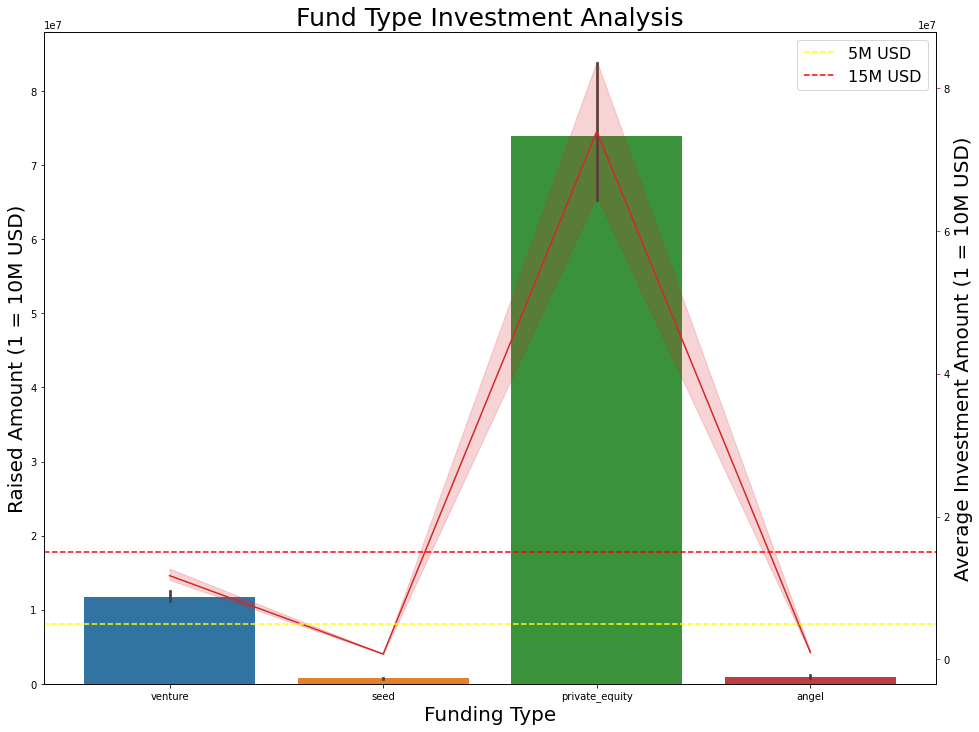

In [101]:
fig, ax1 = plt.subplots(figsize=(16,12))
ax1=sns.barplot(x='funding_round_type',y='raised_amount_usd',data=master_frame)
ax1.set_xlabel('Funding Type',size=20)
ax1.set_ylabel('Raised Amount (1 = 10M USD)',size=20)
ax1.set_title('Fund Type Investment Analysis',size=25)
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2 = sns.lineplot(x='funding_round_type', y='raised_amount_usd', data = master_frame, sort=False, estimator=np.mean, color=color)
ax2.set_ylabel('Average Investment Amount (1 = 10M USD)',size=20)
ax2.tick_params(axis='y', color=color)
plt.axhline(5000000, color='yellow', linestyle='--',label="5M USD")
plt.axhline(15000000, color='red', linestyle='--',label="15M USD")
plt.legend(loc=1, prop = {"size":16})
plt.show()

***Plot 2***

A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.


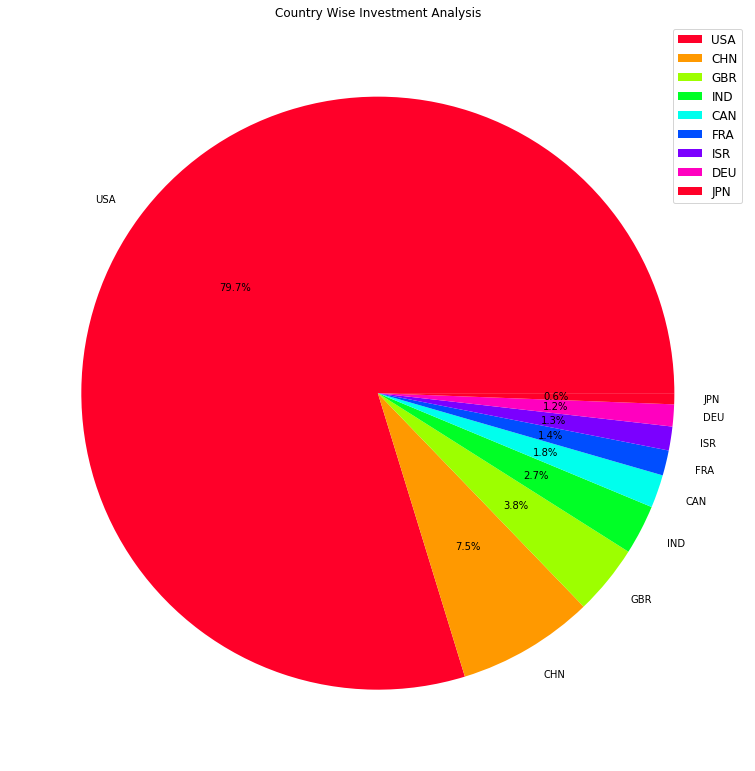

In [102]:
plt.figure(1, figsize=(30,30))
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('gist_rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Country Wise Investment Analysis')
source_pie = plt.pie(top9_bar.raised_amount_usd, labels=top9_bar.index, autopct='%1.1f%%', shadow=False, colors=colors,)
plt.rcParams['font.size'] = 18
plt.legend(loc=1, prop = {"size":12})
plt.show()

***Plot 3***

A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

In [103]:
top3_mapping_range_sector=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])].append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]).append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])])

In [104]:
top3_mapping_range_sector.head(2)

,permalink,funding_round_type,raised_amount_usd,name,country_code,primary_sector,main_sector,main_sector_count,main_sector_total_amount
5,/organization/0xdata,venture,8900000.00000,H2O.ai,USA,analytics,"Social, Finance, Analytics, Advertising",2714,23807376964.00000
28,/organization/128-technology,venture,11999347.00000,128 Technology,USA,service providers,Others,2950,26321007002.00000


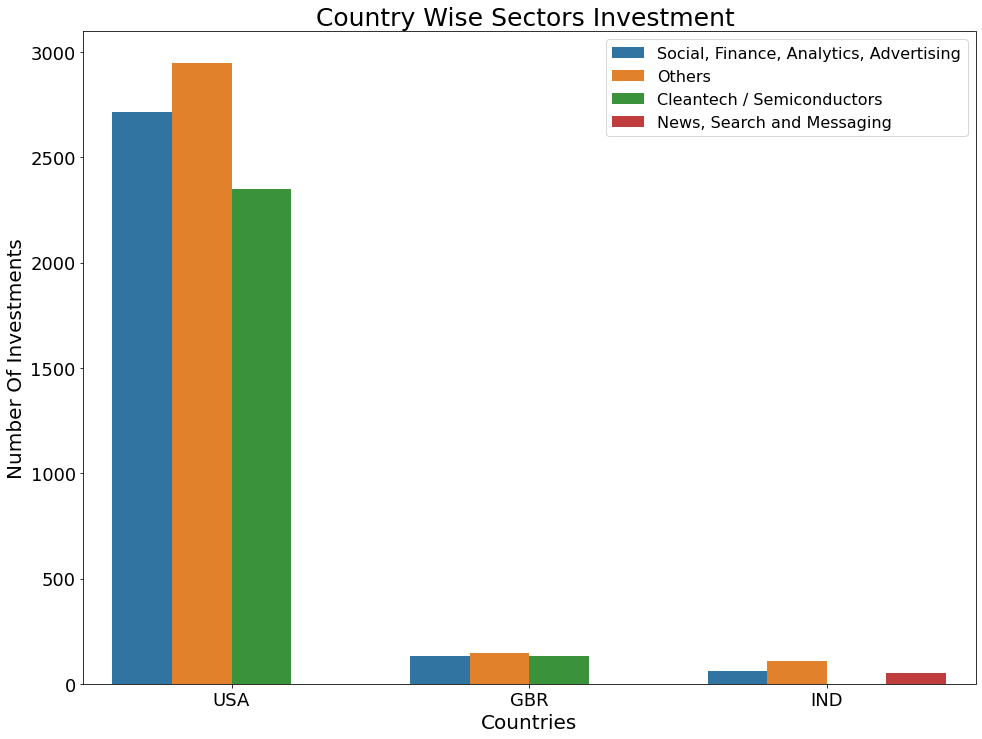

In [105]:
plt.figure(figsize=(16,12))
sns.barplot(x='country_code',y='raised_amount_usd',hue='main_sector',data=top3_mapping_range_sector,estimator=lambda x:len(x))
plt.xlabel('Countries',size=20)
plt.ylabel('Number Of Investments',size=20)
plt.title('Country Wise Sectors Investment ',size=25)
plt.legend(loc=1, prop = {"size":16})
plt.show()